Prve vjezbe

Standardni importi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Arrays

Zadatak 1: Kreiranje Numpy arraya


In [2]:
#1.1 arrays created from python array

a = np.array([1,2,3,4])
b = np.array([[1,2,3],[4,5,6]])
print(b)

#1.2. array comprehensions work well
c = np.array([i for i in range(1,10)])
print(c)

print(a.shape)
print(b.shape)

#Reshape 1D to 2D
#-1 as unspecified
a = a.reshape(-1,1)
print(a.shape)

#Reshape generally
#Find out dimensions of array

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6 7 8 9]
(4,)
(2, 3)
(4, 1)


Zadatak 2: Kreiranje višedimenzionalnih numpy arraya

In [3]:
#Similar operations with multi-dimensional arrays (matrices)

#brute-force
array = np.array([[1,2,3,4],[5,6,7,8]])
print(array)

#double comprehension
array = np.array([[x for x in range(i,j+1)] for (i,j) in [(1,3),(4,6),(7,9)]])
print(array)

#higher-level arrays
array = np.array([[[1,2,3],[4,5,6]],[[1,1,1],[2,2,2]]])
print(array)
print(array.shape)

[[1 2 3 4]
 [5 6 7 8]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[[1 2 3]
  [4 5 6]]

 [[1 1 1]
  [2 2 2]]]
(2, 2, 3)


Zadatak 3: Ostali načini kreiranja numpy arraya

In [4]:
print(np.empty([4,2]))
print(np.zeros([5,5]))
print(np.identity(4))
print(np.eye(4,3))
print(np.random.random(5))

[[0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.52962724e-320]
 [1.81667864e-152 9.26683073e+242]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
[0.8337118  0.16495897 0.27295023 0.71344127 0.87870231]


Zadatak 4: Osnovne aritmetičke operacije

In [5]:
#Elementwise
a = np.array([1,2,3,4])
b = np.array([1,1,1,1])

#Addition
print(a+b)
print(np.add(a,b))

#Substraction
print(a-b)
print(np.subtract(a,b))

#Multiplication
print(a*b)
print(np.multiply(a,b))

#Square root
print(np.sqrt(a))
#np.exp(a)

#Multiplication of arrays by a scalar
print(2*a)
print(b*3)

[2 3 4 5]
[2 3 4 5]
[0 1 2 3]
[0 1 2 3]
[1 2 3 4]
[1 2 3 4]
[1.         1.41421356 1.73205081 2.        ]
[2 4 6 8]
[3 3 3 3]


In [6]:
#CONCEPT: Broadcasting
#if you were designing numpy, what should the following operation do?

print(np.array([1,2,3]) + 1)
print(np.array([1,2,3]) + np.array([1]))

[2 3 4]
[2 3 4]


Zadatak 5: Osnovne arimetičke operacije - množenje

In [7]:
## Exercise 1: basic operations of numpy:

# the @ operator represents matrix multiplication

# numpy offers the following functions, which are all similar but different:
#
#                   vectors     matrices     tensors
#
# __________________________________________________
#  @              |  <a,b>   |     AA     |    ???
#  numpy.inner    |  <a,b>   |   A^T A    |    ???
#  numpy.dot      |  <a,b>   |     AA     |    ???
#  numpy.vdot     |  <a*,b>  |    A:A     |    ???
#  numpy.outer    |  <a,b^T> | a11*A a12*A|    ???
#                            | a21*A a22*A|    ???


##### Inner product

# Exercise 5.1. Implement inner product using loop
x = np.array([1,2,3,4])
y = np.array([2,3,4,5])
skal=0
for i in range(x.shape[0]):
    skal += x[i]+y[i]
print(skal)

# Numpy operations:
print(x.dot(y))
print(np.dot(x,y))
print(np.inner(x,y))

##### Outer product
# Exercise 5.2. Implement outer product using loop
print(np.outer(x,y))

x = x.reshape(-1,1)
print(x.shape)
print(x.T.shape) # transponiranje sa T

A = np.random.random([3,3])
print(A)
print(A.T)

24
40
40
40
[[ 2  3  4  5]
 [ 4  6  8 10]
 [ 6  9 12 15]
 [ 8 12 16 20]]
(4, 1)
(1, 4)
[[0.82253027 0.37919437 0.90001751]
 [0.85985396 0.10340029 0.88291191]
 [0.87028844 0.91011014 0.49132015]]
[[0.82253027 0.85985396 0.87028844]
 [0.37919437 0.10340029 0.91011014]
 [0.90001751 0.88291191 0.49132015]]


Zadatak 6: Intervali

In [8]:
# basic ranges:

array = np.arange(1,17,2)
print(array)

[ 1  3  5  7  9 11 13 15]


Zadatak 7: Rješavanje Ax=b, gdje je A gornjetrokutasta

In [9]:
def backsub(A,b):
    m,n = A.shape
    x = np.zeros(m)
    m -= 1
    for i in range(m,-1,-1): # od zadnjeg [m] pa do prvog [0] i pomicemo se za -1, tj idemo prema gore(gornjetrokutastu matricu imamo)
        x[i] = b[i] - np.dot(x,A[i, n-m-1:])
        x[i] = x[i]/A[i,i]
    return x

Zadatak 8: Stack

In [10]:
# slazemo vektore jedan na drugi

a = np.arange(4)
print(np.stack((a,a,a)))

print(np.stack((a,a,a),axis=1)) # default je axis=0

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]]


Zadatak 9: Concatenate

In [11]:
a = np.arange(15).reshape(3,5)
print(a)

a1 = np.concatenate((a,a,a))
print(a1)
print(a1.shape)

a2 = np.concatenate((a,a,a), axis=1)
print(a2)
print(a2.shape)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
(9, 5)
[[ 0  1  2  3  4  0  1  2  3  4  0  1  2  3  4]
 [ 5  6  7  8  9  5  6  7  8  9  5  6  7  8  9]
 [10 11 12 13 14 10 11 12 13 14 10 11 12 13 14]]
(3, 15)


Zadatak 11: Rad s podacima

In [12]:
# Primjer: Numpy
# Učitamo neke podatke koji su lokalno spremljeni u .csv
podaci = np.loadtxt('data.csv', delimiter=",")
# Pogledamo koliko podataka imamo
podaci.shape

(2000, 2)

In [13]:
# Primjer: Pandas - alat za jednostavno manipuliranje podacima
# Učitamo neke podatke koji su lokalno spremljeni u .csv
podaci = pd.read_csv('data.csv')

# Pregled podataka
podaci.head()

# Pogledamo koliko podataka ima
podaci.shape

(1999, 2)

In [14]:
# Primjer:
X = np.random.random([5,5])
X
np.savetxt('X1', X)

np.loadtxt('X1')

array([[0.3950459 , 0.74599673, 0.38815201, 0.53867259, 0.67667449],
       [0.67210402, 0.43761016, 0.53705407, 0.46782416, 0.30965628],
       [0.40517574, 0.47230921, 0.15826506, 0.33676128, 0.72213053],
       [0.32481496, 0.17393125, 0.02934689, 0.4890967 , 0.98455569],
       [0.47760307, 0.52113231, 0.93943941, 0.2412582 , 0.95182493]])

Upoznavanje s matplotlib, sikit-learn

Zadatak 12: Vizualizacija podataka
- najčešće korišteno: matplotlib.pyplot
- podaci predstavljaju točke u ravnini: scatter plot
- crtanje grafa ovisnosti jedne varijable o drugoj: plot
- crtanje histograma, matrice korelacije
- crtanje vektora

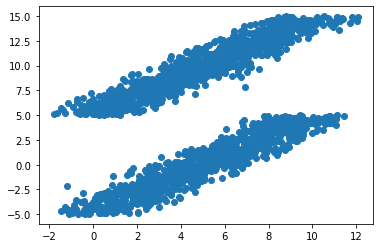

In [16]:
# Učitamo podatke koji su lokalno spremljeni u .csv
podaci = np.loadtxt('data.csv',delimiter=",")

plt.scatter(podaci[:,0],podaci[:,1])
plt.show()

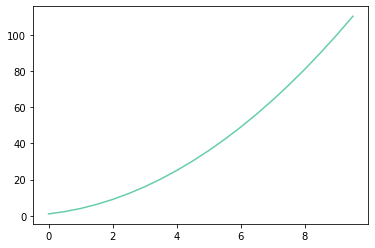

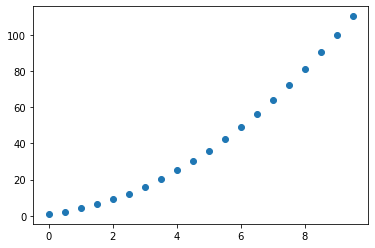

In [23]:
# crtanje grafova funkcija
x = np.arange(0,10,0.5)
y = x**2 + 2*x + 1
plt.plot(x,y, color="mediumaquamarine")
plt.show()

plt.scatter(x,y)
plt.show()